# Lab 6 - Classifiers Boosting Algorithms

In this lab, we will implement the AdaBoost algorithm as an ensemble learning technique which
aims to combine a number of weak classifiers to yield a strong classifier at the end.
The idea of this lab is to identify whether a tumor with given characteristics is malignant or
benign. This is a two-class classification problem.

## Dataset and Features

You will be working on the dataset from *Hastie et al,* for breast tumor classification with 10 features representing the tumor's:
> et al: means and others 

                              1. Area            6. Texture
                              2. Perimeter       7. Symmetry
                              3. Radius          8. Greyscale Level
                              4. Compactness     9. Fractal Dimension
                              5. Concavity      10. Coastline Approximation.
There is one output variable which is diagnosis. It takes one of two values `+1` for malignant and `-1` for benign.

### Question 1:
Why it is sometimes better to have the two class values `+1` and `-1` instead of `+1`
and `0`?\
**HINT :** Think about the voting scheme at the end of the boosting algorithm. How can the class values
affect this scheme?

In [103]:
'''
    Your answer: 
    Because this will make the voting more addressable and meaningful , and it will show the effect of voting of the second class
    as if we choose 0 as indicator for the second class, we will not be able to diffrentiate between its vote and its absence. 
    by which I mean that if the point does not exist will have the same effect as if it voted with 0. 
    as in the voting scheme we accumulate the votes of each class to get certain result. 
    so if the voting of the second class is -1, this will decrease the voting of the positive classes, while if it was 0, it will not affect the result. 

    ie: 
    we have 3 points voting: 1
    we have 2 points voting: the opposite. 

    if the voting of the second class is 0, then the result will be 3.
    while if the voting of the second class is -1, then the result will be 1.
    which is more meaningful, as 3 may represent a high value and it may be deceiving. 
'''

'\n    Your answer: \n    Because this will make the voting more addressable and meaningful , and it will show the effect of voting of the second class\n    as if we choose 0 as indicator for the second class, we will not be able to diffrentiate between its vote and its absence. \n    by which I mean that if the point does not exist will have the same effect as if it voted with 0. \n    as in the voting scheme we accumulate the votes of each class to get certain result. \n    so if the voting of the second class is -1, this will decrease the voting of the positive classes, while if it was 0, it will not affect the result. \n\n    ie: \n    we have 3 points voting: 1\n    we have 2 points voting: the opposite. \n\n    if the voting of the second class is 0, then the result will be 3.\n    while if the voting of the second class is -1, then the result will be 1.\n    which is more meaningful, as 3 may represent a high value and it may be deceiving. \n'

## Requirement
You are required to fill the function `adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf).`\
This function takes as parameters:

| | |
|:---|:-|
| **Y_train**| The target values for the training set |
| **X_train**| The input features for the training set.|
| **Y_test**| The target values for the test set.|
| **X_test**| The input features for the test set.|
| **T**| The number of iterations of the AdaBoost Algorithm.|
| **clf**| The classifier to be used. (In our case, we are using a decision tree stump as a base classifier). You can use any other classifier.|

This function should return two values:
- The accuracy of the model on the training set.
- The accuracy of the model on the test set.


#### Fair Note:
In the explanation video, we assumed that (T) is the number of models you want to fit. However, this is not always the case. You may have a model base (like here we have decision trees) and you are allowed to use as many of it as you can. So (T) here becomes the number of iterations where your goal is to enhance the performance with as few iterations as possible. 

Do not get confused:
- If your case is you have T models only, we set T = number of models to fit.
- If you are allowed to use as many models as you can (as many decision trees as you need), then T is the number of iterations to choose. In such case, T becomes a parameter controlled by the programmer.

In [104]:
## imports ##
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2

import utils

**NOTE** we prepared some utility functions to help you throughout the lab. please go and check the file *utils.py* and make sure you understand each function and know how to use it.

### TODO: AdaBoost Implementation

AdaBoost is an iterative algorithm that gives weights for the best classifier every iteration, updates weights of the data points, then repeats until convergence.

The steps of the algorithm are:

1. Initialize weights of the training examples:

$$w_{m} = \frac {1}{M}, m = 1,2,...M$$

                                        M: number of training examples. 

2. For t=1 to $T$:

    a) Select a classifier $h_{t}$ that best fits to the training data using weights $w_{m}$ of the training examples.

    b) Compute error of $h_{t}$ as:
$$err_{t} = \frac {\Sigma_{m=1}^{M} w_{m} \phi (c_{m} \neq h_{t}(x_{m}))}{\Sigma_{m=1}^{M} w_{m}}$$

    c) Compute weight of classifier:
$$\alpha_{t} = \log (\frac {1-err_{t}}{err_{t}} )$$

    d) Update weights of wrongly classified examples:
$$w_{m} = w_{m} * \exp^{\alpha_{t} \phi (c_{m} \neq h_{t}(x_{m}))}, \space m = 1 ... M$$

    e) Renormalize weights $w_{m}$


\
3. Output: $C(x)= argmax_{k}\space (\space \Sigma_{t=1}^{T} \alpha_{t} * \phi (h_{t}(x) = k)) \space)$

**Where** in step 2.B and 2.D, the $\phi (y)$ function is called the *miss indicator* function that gives values:

                                     1: if y is True
                                     0: if y is False

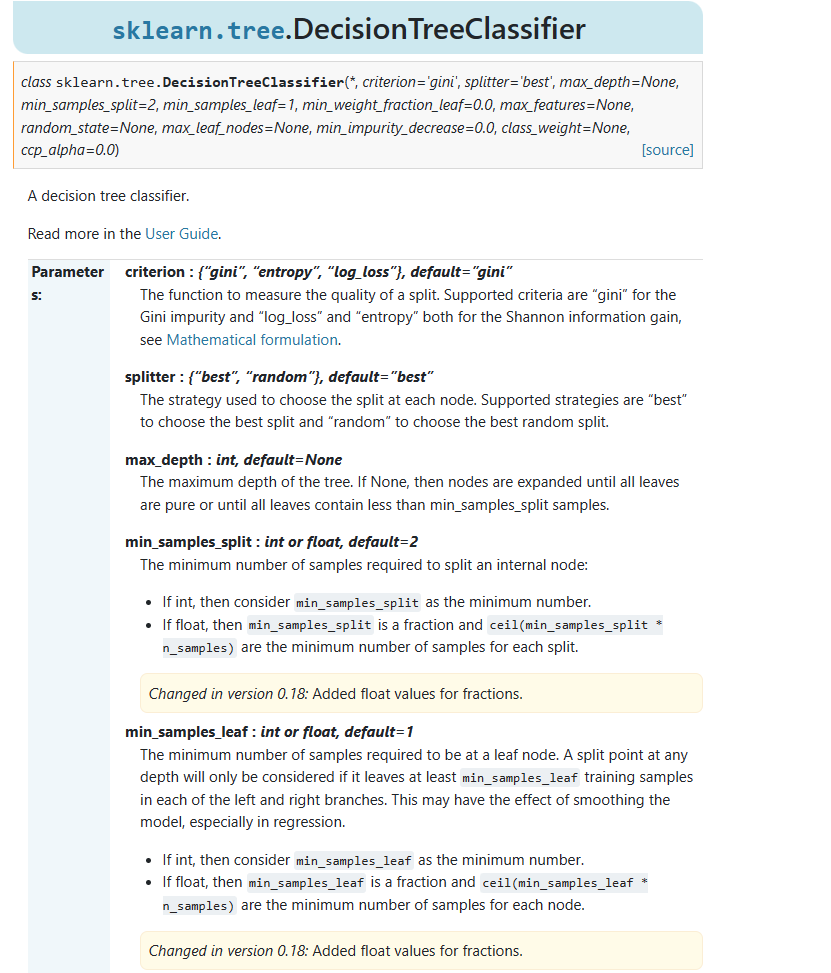

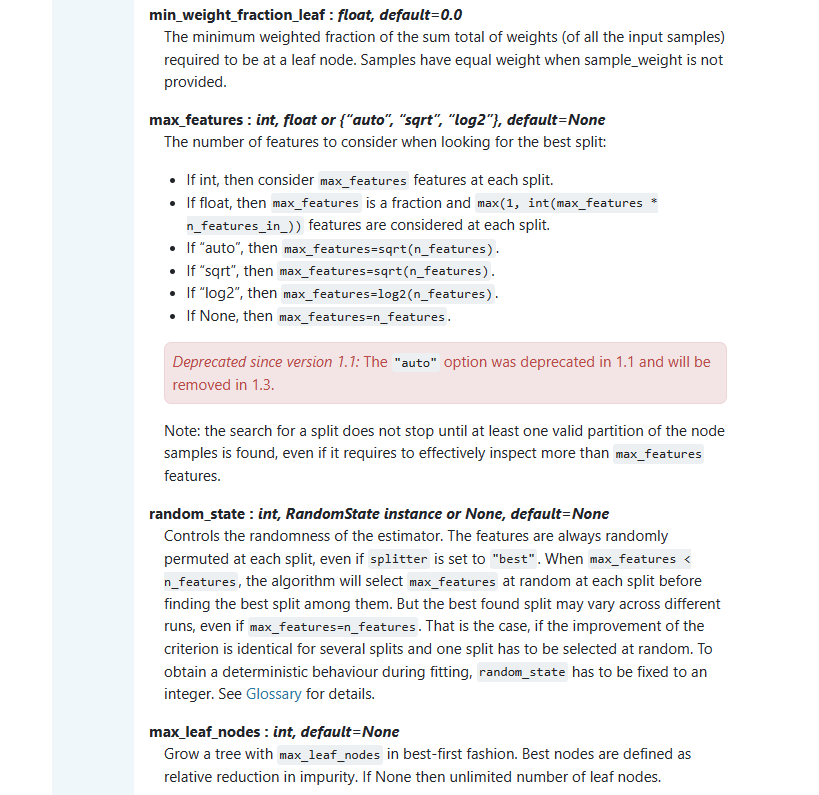

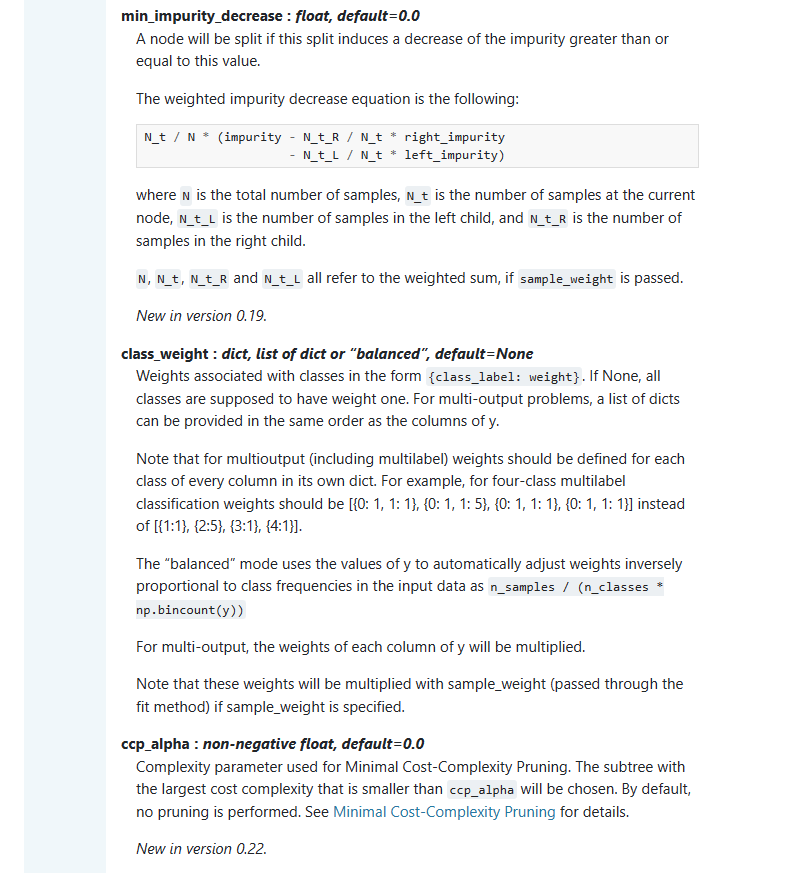

In [105]:
def adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf):
    
    #TODO: FILL THE FUNCTION with the implementation as the steps above
    #? Vectorizing all trains. 
    Y_train = np.array(Y_train)
    X_train = np.array(X_train)
    Y_test = np.array(Y_test)
    X_test = np.array(X_test)
    # # TODO [1]: Initialize weights
    # #? generate train of ones, with same length of the training data, then multiply all of them by 1/M, where M is the # of rows in the training data
    w = np.divide(1, X_train.shape[0]) * np.ones(X_train.shape[0])
    
    # ## TODO [2]:  Initialize the training and test data with empty array placeholders
    # #### Hint: what should be their shape?
    # #? they should be the same shape of the trains, test like test_train, and train like train_train.    
    pred_train = np.zeros((T, len(Y_train))) ## predicted classes of the training examples
    pred_test = np.zeros((T, len(Y_test)))  ## predicted classes of the test exateY_test


    ## TODO [3]: loop over the boosting iterations 
    #? we loop in range T, as T here is the number of iterations. 
    for i in range(T): 
        # TODO [4]: Fit a classifier with the specific weights 
        ## TODO [4.A]: fit the classifier on the training data
        #### Hint: search how sklearn.tree.DecisionTreeClassifier fits classifier on data
        ### Hint: search for parameter weights in the fit matrix
        # model = DecisionTreeClassifier().fit(X_train, Y_train, w) #! but here we should not make it hardcoded as Decision tree, as clf may change
        clf = clf.fit(X_train, Y_train, w)
        
        # TODO [4.B]: predict classes for the training data and test data
        pred_train_i = np.array(clf.predict(X_train)) 
        pred_test_i = np.array(clf.predict(X_test))
        
        # TODO [5]: calculate the miss Indicator function
        missIndicator = np.array(pred_train_i != Y_train)

        # TODO [6]: calculate the error for the current classifier (err_t)
        weightOfWrongClassified =  np.multiply(w , missIndicator)
        accumlationOfWeightOfWrongClassified = np.sum(weightOfWrongClassified)
        sumOfWeights = np.sum(w)
        err_t = np.divide(accumlationOfWeightOfWrongClassified, sumOfWeights)
        
        # TODO [7]: calculate current classifier weight (Alpha_t)
        errRatio = np.divide(1 - err_t, err_t)
        alpha_t = np.log(errRatio)
        
        # TODO [8]: update the weights 
        exponentialEval = np.exp(np.multiply(alpha_t, missIndicator))
        w = np.multiply(w,exponentialEval)
        # TODO [9] Add to the overall predictions
        # w = np.divide(w, X_train.shape[0]) # renormalization of weights  #! this line cause error, generates NaNs, I don't know why. 
        pred_test[i] = pred_test_i * alpha_t
        pred_train[i] = pred_train_i * alpha_t

        

    # Now pred_train is an array of t rows with predictions scaled by alpha as the formula suggested.
    # Need to add all these and come up with one row for the classification results
    # We will use the voting scheme that relies on the sign since classes are -1 and +1

    final_pred_train = np.sum(pred_train, axis=0)
    final_pred_test = np.sum(pred_test, axis=0)

    # apply the sign function on all of them:
    final_pred_train[final_pred_train >= 0], final_pred_train[final_pred_train < 0]= 1, -1
    final_pred_test[final_pred_test >= 0], final_pred_test[final_pred_test < 0]= 1, -1


    
    # TODO [10]: Return error rate in train and test set 
    #### Hint: use function get_accuracy from utils.py
    train_acc = utils.get_accuracy(final_pred_train, Y_train )
    test_acc = utils.get_accuracy(final_pred_test, Y_test )
    return train_acc, test_acc


    #! shouldn't I use get_error_rate instead? 
    # train_error = utils.get_error_rate(final_pred_train, Y_train)
    # test_error = utils.get_error_rate(final_pred_test,Y_test)
    # return train_error, test_error


### Testing the Boosted Classifier

Now we will use the function you implemented to build a classifer.\
You will not change code here, only read the code below and run it to see how **AdaBoost** enhanced the performance.

Reading Data ...
Number of Iterations :  10
Number of Iterations :  60
Number of Iterations :  110
Number of Iterations :  160
Number of Iterations :  210
Number of Iterations :  260
Number of Iterations :  310
Number of Iterations :  360


c:\GitHub\FacultyOfEngineeringMaterial\ThirdYear\SecondTerm\Nural_Networks\Labs\Lab 6 - AdaBoost Classifier\utils.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(range(0, 450, 50))


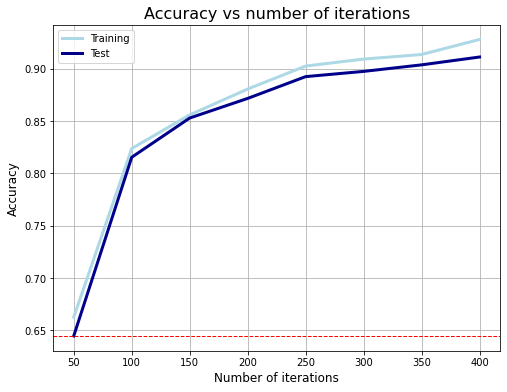

In [106]:
#### DO NOT CHANGE CODE ####

## First, read the dataset
x,y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
print('Reading Data ...')

# Split into training and test set
train, test = train_test_split(df, test_size=0.2) # this function shuffles the data points, and splits the data into
                                                  # 80% training set and 20% test set (indicated by test_size=0.2)

X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]

# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
acc_train, acc_test = [],[]
x_range = range(10, 410, 50)
for i in x_range:
    print('Number of Iterations : ' , i)
    acc_i = adaboost_classifier(Y_train, X_train, Y_test, X_test, i, clf_tree)
    acc_train.append(acc_i[0])
    acc_test.append(acc_i[1])

# Compare error rate vs number of iterations
utils.plot_accuracy(acc_train, acc_test)

> I will leave this screenshot here, because I use darktheme and the values on axis is not clear, so in case.

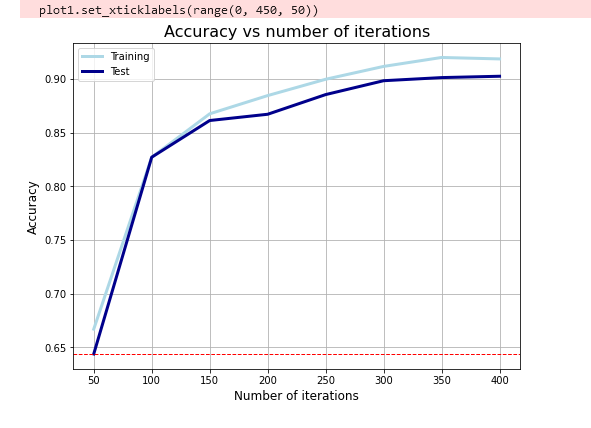

### Question 2:
Justify why the plot is the way it is (is it increasing or decreasing? why? when does it flattens out?)

In [107]:
'''
    Your answer:
    It makes sense that as the number of iterations increases the accuracy should increase, as it allows ada boost to modify weights and correct the wrongly 
    classified datapoints. 
    moreover, the algorithm learns from its previous mistakes, and in each iteration it start choosing a new weak classifier in order to be able to fix
    the mistakes of the previous weak classifiers, so it gets more wise, by getting the vote of more weak classifiers. 

    it will flattens out when the algorithm reach its convergence, so no more weights to be updated. 

    > Question here: 
    * does it suffer from overfitting? or it just reach convergence so no more improvement can occur on the data, but on the otherhand it classify the test 
    data points also correctly? 
'''

'\n    Your answer:\n    It makes sense that as the number of iterations increases the accuracy should increase, as it allows ada boost to modify weights and correct the wrongly \n    classified datapoints. \n    moreover, the algorithm learns from its previous mistakes, and in each iteration it start choosing a new weak classifier in order to be able to fix\n    the mistakes of the previous weak classifiers, so it gets more wise, by getting the vote of more weak classifiers. \n\n    it will flattens out when the algorithm reach its convergence, so no more weights to be updated. \n\n    > Question here: \n    * does it suffer from overfitting? or it just reach convergence so no more improvement can occur on the data, but on the otherhand it classify the test \n    data points also correctly? \n'

### Question 3

The number of iterations (T) is what we call a hyper parameter:
   - Its value differs from model to model and from problem to problem.
   - Its value is not learnt by time, it is set by the programmer.
   
Suggest ways to select the optimal T keeping in mind that:
   - If T is too big, the training time is large (you loop for T times, each time takes a model to fit and this model might take hours to fit)
   - If T is too small, the boosting might not reach the best values it can get.
   
   

**HINT**: Look at the graph of number of iterations vs performance and search for elbow method. Try to understand it and explain what it does.\
**HINT**: There are other hyper-parameter selection techniques, search for them as well.

In [108]:
'''
    Your answer:
    First things first, elbow method is a method used to get a point after which, the increasing in the performance is not significant. 
    so at this point, the performance starts to flatten out as the number of iterations increases. 
    so in our case our elbow point may be one of these two points, either 150 or 100, but I see that 150 is a better elbow point, as 
    the performance still increases much after the point 100. 
    so here we can consider this method in order to be able to choose the value of T. 
    * this method falls under a technique which is called a Learning curve technique, in which we plot the performance and stop at the point where the performance
    does not enhanced that much. 

    Second things second, there are other techniques available such as 
    1. Grid search: This involves trying a range of values for the number of iterations and evaluating the performance of the model using cross-validation. The value that gives the best performance is selected.

    2. Early stopping: This involves monitoring the performance of the model on a validation set during training and stopping the training when the performance starts to decrease.

    3. Learning curve: This involves plotting the performance of the model as a function of the number of iterations and selecting the point at which the performance starts to level off.

    4. Boosting-specific metrics: Some metrics, such as the training error, the test error, and the margin, can be used to monitor the performance of the model during training and select a suitable number of iterations.

    References: 
    1. https://en.wikipedia.org/wiki/Elbow_method_(clustering)
    2. https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20
'''

'\n    Your answer:\n    First things first, elbow method is a method used to get a point after which, the increasing in the performance is not significant. \n    so at this point, the performance starts to flatten out as the number of iterations increases. \n    so in our case our elbow point may be one of these two points, either 150 or 100, but I see that 150 is a better elbow point, as \n    the performance still increases much after the point 100. \n    so here we can consider this method in order to be able to choose the value of T. \n    * this method falls under a technique which is called a Learning curve technique, in which we plot the performance and stop at the point where the performance\n    does not enhanced that much. \n\n    Second things second, there are other techniques available such as \n    1. Grid search: This involves trying a range of values for the number of iterations and evaluating the performance of the model using cross-validation. The value that gives th

## Easy lab :)